In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import ccdc

In [ ]:
# crop_names = m.loc[m['key_crop_name'] != 'No Match', 'key_crop_name'].unique().tolist()

In [77]:
downloader = ccdc.DataDownloader(
    county_name = 'Monterey', 
    year = 2008, 
    crop_names= 'Winter Wheat')

output_dataset = downloader(output_type = "all", daily_climate=True)

In [78]:
output_dataset['climate_data'].shape

(365, 8, 185, 170)

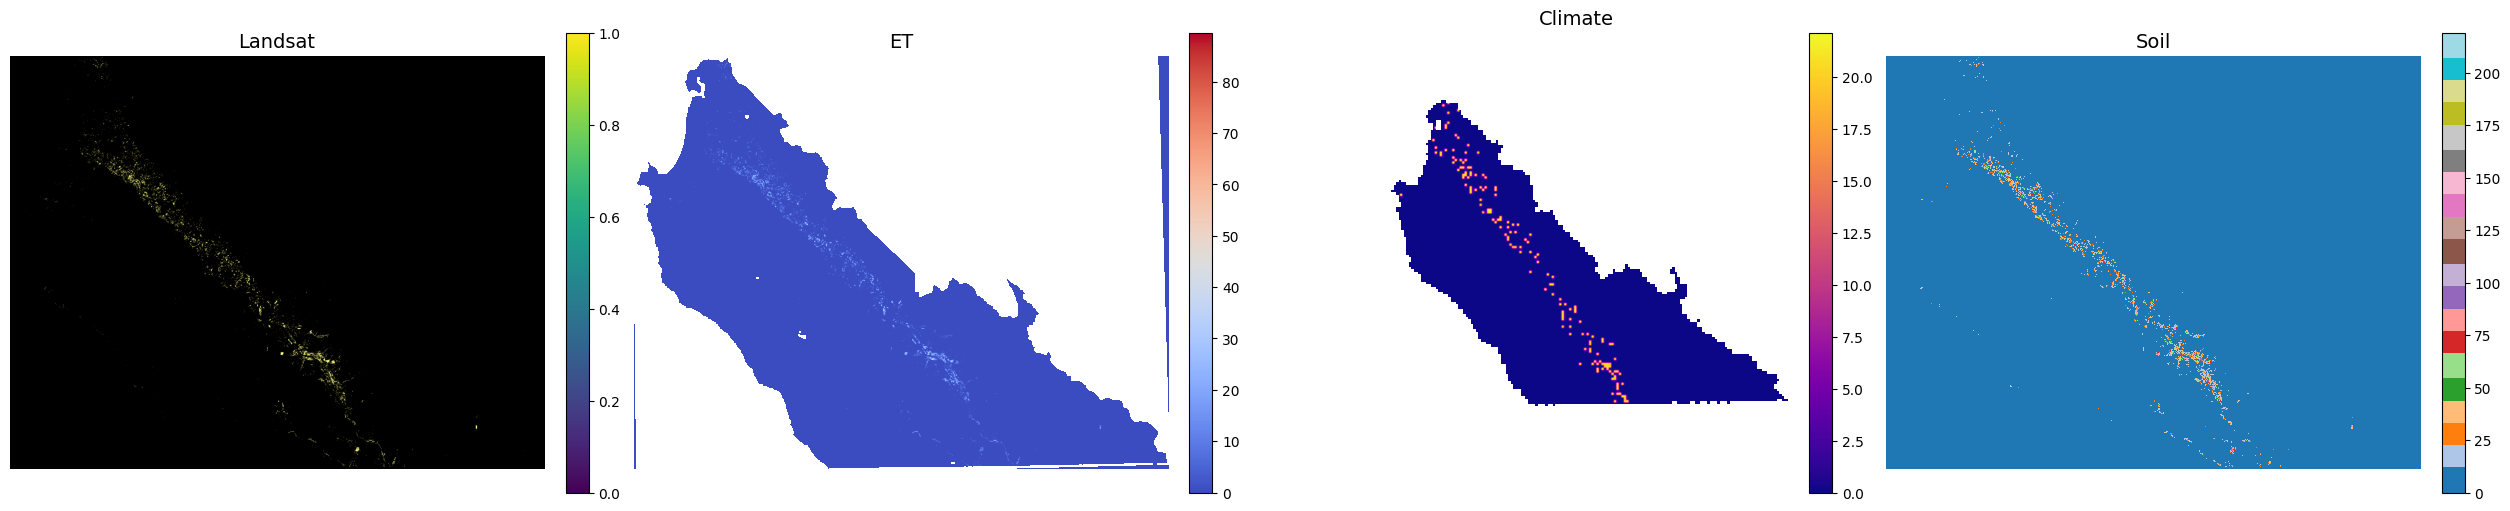

In [79]:
ccdc.plot_datasets(output_dataset['landsat_data'][5, 0, :3, ...], output_dataset['et_data'][0, 0, 0, ...], output_dataset['climate_data'][0, 1, ...], output_dataset['soil_data'])

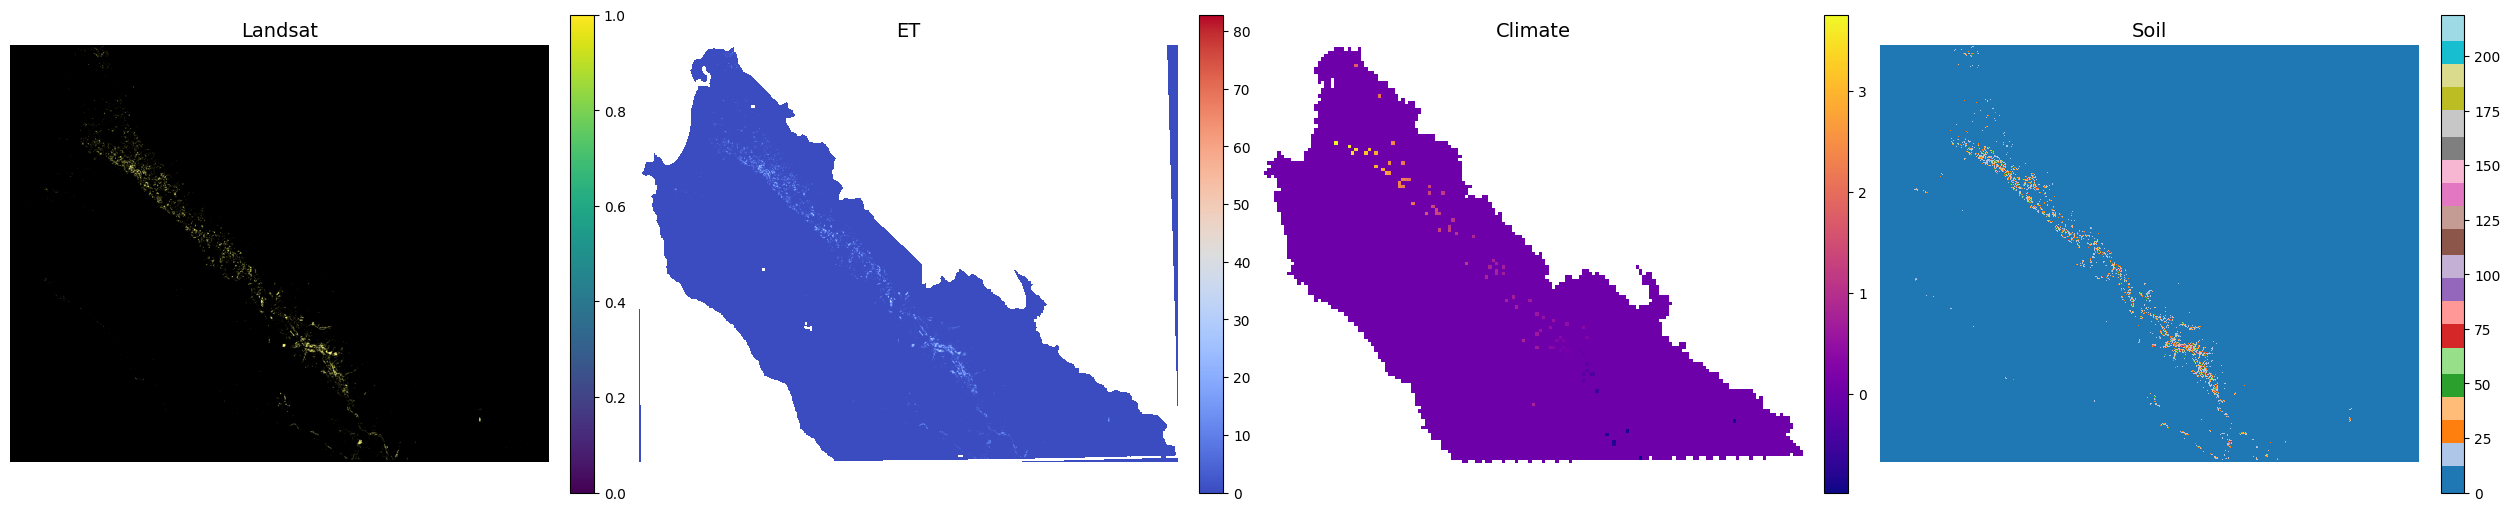

In [61]:
ccdc.plot_datasets(output_dataset['landsat_data'][5, 0, :3, ...], output_dataset['et_data'][0, 0, 0, ...], output_dataset['climate_data'][0, 1, ...], output_dataset['soil_data'][0, ...])

In [11]:
import os
import rasterio

# Define channel indices for RGB, NIR, SWIR1, and SWIR2 for Landsat 5, 7, and 8
channel_indices = {
    "Landsat5": [1, 2, 3, 4, 5, 7],  # Band 1: Blue, Band 2: Green, Band 3: Red, Band 4: NIR, Band 5: SWIR1, Band 7: SWIR2
    "Landsat7": [1, 2, 3, 4, 5, 7],  # Same as Landsat 5
    "Landsat8": [2, 3, 4, 5, 6, 7],  # Band 2: Blue, Band 3: Green, Band 4: Red, Band 5: NIR, Band 6: SWIR1, Band 7: SWIR2
}

def process_tiff_files(base_folder):
    for year_folder in os.listdir(base_folder):
        if year_folder.isdigit() and 2008 <= int(year_folder) <= 2023:  # Only process folders for the year range
            year_folder_path = os.path.join(base_folder, year_folder)
            if os.path.isdir(year_folder_path):
                for file_name in os.listdir(year_folder_path):
                    if file_name.endswith(".tif"):
                        file_path = os.path.join(year_folder_path, file_name)
                        
                        # Extract the year from the file name (not folder)
                        year = extract_year_from_file_name(file_name)
                        
                        if year is not None and 2008 <= year <= 2023:
                            # Determine Landsat satellite
                            if year <= 2012:
                                satellite = "Landsat5"
                            elif year <= 2013:
                                satellite = "Landsat7"
                            else:
                                satellite = "Landsat8"
                            
                            with rasterio.open(file_path) as src:
                                num_channels = src.count
                                if num_channels > 6:
                                    selected_indices = channel_indices[satellite]
                                    selected_bands = src.read(selected_indices)
                                    
                                    # Save the selected bands to a new file
                                    output_folder = os.path.join(base_folder, "processed", year_folder)
                                    os.makedirs(output_folder, exist_ok=True)
                                    output_path = os.path.join(output_folder, f"processed_{file_name}")
                                    
                                    profile = src.profile
                                    profile.update(count=len(selected_indices))
                                    
                                    with rasterio.open(output_path, "w", **profile) as dst:
                                        dst.write(selected_bands)
                                    
                                    print(f"Processed {file_name}: {satellite} -> {output_path}")

def extract_year_from_file_name(file_name):
    # Example filename: Monterey_LT_20080207
    # Extract the year (4th component) from the filename format
    parts = file_name.split("_")
    if len(parts) > 2:
        try:
            date_str = parts[-1]
            year = int(date_str[:4])  # First 4 digits are the year
            return year
        except ValueError:
            return None
    return None

# Specify the base folder containing year-based folders
base_folder = "/data2/hkaman/Data/FoundationModel/Monterey/Landsat"
process_tiff_files(base_folder)

Processed Monterey_LT_20110404.tif: Landsat5 -> /data2/hkaman/Data/FoundationModel/Monterey/Landsat/processed/2011/processed_Monterey_LT_20110404.tif
Processed Monterey_LT_20111102.tif: Landsat5 -> /data2/hkaman/Data/FoundationModel/Monterey/Landsat/processed/2011/processed_Monterey_LT_20111102.tif
Processed Monterey_LT_20110506.tif: Landsat5 -> /data2/hkaman/Data/FoundationModel/Monterey/Landsat/processed/2011/processed_Monterey_LT_20110506.tif
Processed Monterey_LT_20110607.tif: Landsat5 -> /data2/hkaman/Data/FoundationModel/Monterey/Landsat/processed/2011/processed_Monterey_LT_20110607.tif
Processed Monterey_LT_20111013.tif: Landsat5 -> /data2/hkaman/Data/FoundationModel/Monterey/Landsat/processed/2011/processed_Monterey_LT_20111013.tif
Processed Monterey_LT_20110927.tif: Landsat5 -> /data2/hkaman/Data/FoundationModel/Monterey/Landsat/processed/2011/processed_Monterey_LT_20110927.tif
Processed Monterey_LT_20181203.tif: Landsat8 -> /data2/hkaman/Data/FoundationModel/Monterey/Landsat/